In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.ml import Pipeline
from pyspark.ml.regression import RandomForestRegressor, GBTRegressor, LinearRegression
from pyspark.ml.feature import VectorIndexer
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.feature import VectorAssembler


Let's now calculate the temperature trend in the 3 months of February, March and April

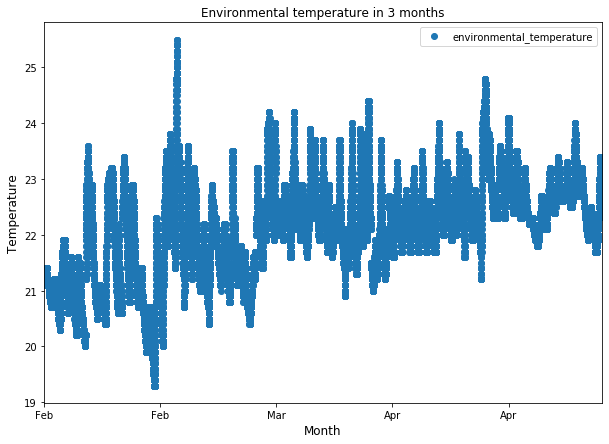

In [2]:
import numpy
df = pd.read_csv("../Ivan Compagnucci/EDA-EnterpriseDataAnalytics-project/Data/Prediction data/environmental.csv")

df.plot(x='Month', y='environmental_temperature', style='o',figsize=(10,7))  
plt.title('Environmental temperature in 3 months')  
plt.xlabel('Month', size=12)  
plt.ylabel('Temperature', size=12) 

plt.show()

Seeing the trend of temperatures during the months of February, March and April we can see (as expected) an increase in the average temperature.
Now we will divide the dataset per month and we will calculate the average of the environmental temperature for each month

In [3]:
dfFEB = df[df['Month'] == 'Feb']
dfMAR = df[df['Month'] == 'Mar']
dfAPR = df[df['Month'] == 'Apr']

dfMAR.to_csv("../Ivan Compagnucci/EDA-EnterpriseDataAnalytics-project/Data/Prediction data/environmentalMAR.csv", index=False)
dfFEB.to_csv("../Ivan Compagnucci/EDA-EnterpriseDataAnalytics-project/Data/Prediction data/environmentalFEB.csv", index=False)
dfAPR.to_csv("../Ivan Compagnucci/EDA-EnterpriseDataAnalytics-project/Data/Prediction data/environmentalAPR.csv", index=False)

print("File separated by year!")

TempAVGFEB = dfFEB["environmental_temperature"].mean()
TempAVGMAR = dfMAR["environmental_temperature"].mean()
TempAVGAPR = dfAPR["environmental_temperature"].mean()

print("The average environmental temperature in Febraury was:",TempAVGFEB)
print("The average environmental temperature in March was:",TempAVGMAR)
print("The average environmental temperature in April was:",TempAVGAPR)

File separated by year!
The average environmental temperature in Febraury was: 21.55947390802531
The average environmental temperature in March was: 22.16208463949834
The average environmental temperature in April was: 22.53172182967599


To apply linear regression, I have to change the nominal variables of the months to numeric variables. 
Meanwhile, let's eliminate useless columns for each month.

In [4]:
dfFEB= pd.read_csv("../Ivan Compagnucci/EDA-EnterpriseDataAnalytics-project/Data/Prediction data/environmentalFEB.csv", usecols=["srtDate","environmental_temperature","Month","Day"])
dfFEB['srtDate'] = pd.to_datetime(dfFEB['srtDate'],utc=True)
dfFEB['Month'] = dfFEB['srtDate'].dt.month

dfMAR= pd.read_csv("../Ivan Compagnucci/EDA-EnterpriseDataAnalytics-project/Data/Prediction data/environmentalMAR.csv", usecols=["srtDate","environmental_temperature","Month","Day"])
dfMAR['srtDate'] = pd.to_datetime(dfMAR['srtDate'],utc=True)
dfMAR['Month'] = dfMAR['srtDate'].dt.month

dfAPR= pd.read_csv("../Ivan Compagnucci/EDA-EnterpriseDataAnalytics-project/Data/Prediction data/environmentalAPR.csv", usecols=["srtDate","environmental_temperature","Month","Day"])
dfAPR['srtDate'] = pd.to_datetime(dfAPR['srtDate'],utc=True)
dfAPR['Month'] = dfAPR['srtDate'].dt.month

df= pd.read_csv("../Ivan Compagnucci/EDA-EnterpriseDataAnalytics-project/Data/Prediction data/environmental.csv", usecols=["srtDate","environmental_temperature","Month","Day"])
df['srtDate'] = pd.to_datetime(df['srtDate'],utc=True)
df['Month'] = df['srtDate'].dt.month

df

,srtDate,environmental_temperature,Month,Day
0,2019-02-02 09:24:09.972000+00:00,21.1,2,2
1,2019-02-02 09:26:09.976000+00:00,21.1,2,2
2,2019-02-02 09:28:10.109000+00:00,21.1,2,2
3,2019-02-02 09:30:10.460000+00:00,21.1,2,2
4,2019-02-02 09:32:11.064000+00:00,21.1,2,2
...,...,...,...,...
48039,2019-04-30 23:51:39.441000+00:00,22.5,4,30
48040,2019-04-30 23:53:40.239000+00:00,22.5,4,30
48041,2019-04-30 23:55:40.399000+00:00,22.5,4,30
48042,2019-04-30 23:57:40.143000+00:00,22.5,4,30


Now thanks to the __train_test_split method__ , we can divide the datasets into two datasets: one for the train (80%) and the remaining data for the test (20%). 
This procedure will be performed on the .csv file containing all the months and on the 3 .csv files of the separate months.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

train_setFEB, test_setFEB = train_test_split(dfFEB, test_size=0.2, random_state=42)

train_setMAR, test_setMAR = train_test_split(dfMAR, test_size=0.2, random_state=42)

train_setAPR, test_setAPR = train_test_split(dfAPR, test_size=0.2, random_state=42)

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)


In [5]:
import findspark
findspark.init()


In [20]:
from pyspark import SparkConf, SparkContext
import os

os.environ['PYSPARK_SUBMIT_ARGS'] = "--master mymaster --total-executor 2 --conf "spark.driver.extraJavaOptions=-Dhttp.proxyHost=proxy.mycorp.com-Dhttp.proxyPort=1234 -Dhttp.nonProxyHosts=localhost|.mycorp.com|127.0.0.1 -Dhttps.proxyHost=proxy.mycorp.com -Dhttps.proxyPort=1234 -Dhttps.nonProxyHosts=localhost|.mycorp.com|127.0.0.1 pyspark-shell"

conf = SparkConf().setMaster("yarn-client")
sc = SparkContext(conf = conf)

SyntaxError: invalid syntax (<ipython-input-20-bd3b41ac65ee>, line 4)


Finally, this is a comparison of the average temperatures of the 3 months compared. Obviously in the estimated months there is an increase in temperature as summer is coming.

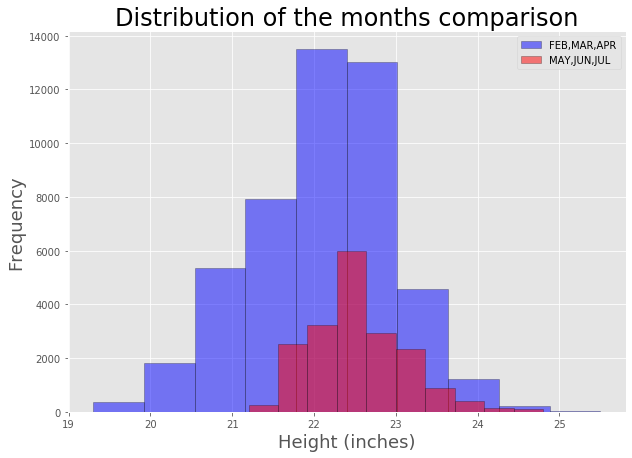

In [149]:
plt.style.use('ggplot')
df = pd.read_csv("../Ivan Compagnucci/EDA-EnterpriseDataAnalytics-project/Data/Prediction data/environmental.csv")
df['environmental_temperature'].plot(kind='hist',color='blue',edgecolor='black',alpha=0.5,figsize=(10,7))
dfAPR['environmental_temperature'].plot(kind='hist',color='red',edgecolor='black',alpha=0.5,figsize=(10,7))

plt.legend(labels=['FEB,MAR,APR','MAY,JUN,JUL'])
plt.title('Distribution of the months comparison', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Frequency', size=18);